In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time
from IPython.display import display, clear_output
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
# Create images directory if it doesn't exist
IMAGES_PATH = os.path.join('data', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

labels = ['awake', 'drowsy']
number_imgs = 10

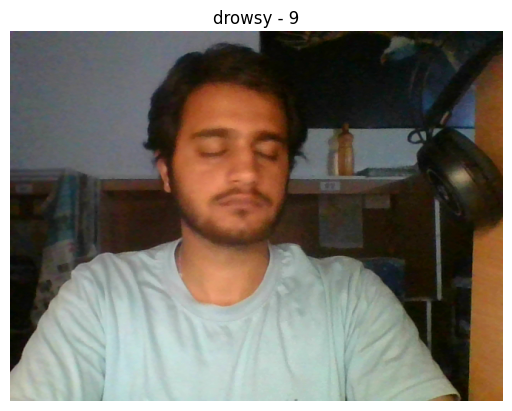

In [6]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')
        
        # Webcam feed
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to capture image")
            continue
        
        # Naming our image path
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        
        # Write image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen using matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f'{label} - {img_num}')
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)  # Clear previous image display
        
        # 2 second delay between captures
        time.sleep(2)

cap.release()

In [5]:
!cd yolov5 && python train.py \
--img 416 \
--batch 4 \
--epochs 100 \
--data dataset.yml \
--weights yolov5n.pt \
--workers 2

train: weights=yolov5n.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=4, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Saksham': No such file or directory
YOLOv5  2025-5-19 Python-3.12.0 torch-2.4.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="C:\\Users\\Saksham Gupta\\Driver Drowsiness\\yolov5\\runs\\train\\exp5\\weights\\best.pt"
, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Saksham Gupta/.cache\torch\hub\master.zip
YOLOv5  2025-5-20 Python-3.12.0 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1782166 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [6]:
img = os.path.join('data', 'images', 'drowsy.fb1bc188-34d6-11f0-90c9-c0353225e01a.jpg')

image 1/1: 480x640 1 drowsy
Speed: 5.0ms pre-process, 212.2ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


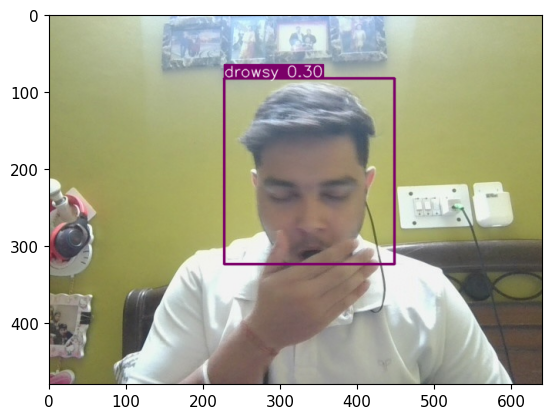

In [7]:
model.conf = 0.08  # Set confidence threshold to 8%
results = model(img)

# Get all predictions
predictions = results.pred[0]  # shape: [num_predictions, 6]

if predictions is not None and len(predictions) > 0:
    # Filter predictions for class 15 (awake) and 16 (drowsy) only
    filtered_preds = predictions[(predictions[:, 5] == 15) | (predictions[:, 5] == 16)]

    if len(filtered_preds) > 0:
        # Get the prediction with the highest confidence
        top_prediction = filtered_preds[torch.argmax(filtered_preds[:, 4])].unsqueeze(0)

        # Keep only the top prediction
        results.pred[0] = top_prediction
    else:
        # No relevant class found
        results.pred[0] = torch.empty((0, 6))

results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()